In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

data\bishop_resized\00000000_resized.jpg
data\bishop_resized\00000002_resized.jpg
data\bishop_resized\00000003_resized.jpg
data\bishop_resized\00000004_resized.jpg
data\bishop_resized\00000005_resized.jpg
data\bishop_resized\00000006_resized.jpg
data\bishop_resized\00000008_resized.jpg
data\bishop_resized\00000009_resized.jpg
data\bishop_resized\00000010_resized.jpg
data\bishop_resized\00000013_resized.jpg
data\bishop_resized\00000014_resized.jpg
data\bishop_resized\00000015_resized.jpg
data\bishop_resized\00000016_resized.jpg
data\bishop_resized\00000017_resized.jpg
data\bishop_resized\00000018_resized.jpg
data\bishop_resized\00000020_resized.jpg
data\bishop_resized\00000022_resized.jpg
data\bishop_resized\00000023_resized.jpg
data\bishop_resized\00000025_resized.jpg
data\bishop_resized\00000026_resized.jpg
data\bishop_resized\00000027_resized.jpg
data\bishop_resized\00000029_resized.jpg
data\bishop_resized\00000031_resized.jpg
data\bishop_resized\00000032_resized.jpg
data\bishop_resi

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from  keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.callbacks import EarlyStopping 
import keras

In [50]:
path = "data"
test_path = "test_data"

In [51]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.2,
                                                               image_size=(224,224),
                                                               batch_size=32,
                                                               subset="training",
                                                               seed=123)

Found 5086 files belonging to 5 classes.
Using 4069 files for training.


In [52]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_path,validation_split=0.2,
                                                               image_size=(224,224),
                                                               batch_size=32,
                                                               subset="validation",
                                                               seed=123)

Found 147 files belonging to 5 classes.
Using 29 files for validation.


In [53]:
class_names = ['queen','rook','bishop','pawn','knight']

In [54]:
inputs = tf.keras.Input(shape = (224,224,3))
preprocess = tf.keras.applications.mobilenet.preprocess_input(inputs)
upscale = tf.keras.layers.Lambda(lambda x : tf.image.resize_with_pad(x,
                                                                     224,
                                                                     224,
                                                                     method = tf.image.ResizeMethod.BILINEAR))(inputs)

In [55]:
mobilenet = MobileNet(include_top='True', weights='imagenet' ,input_tensor = (upscale),
                       input_shape = (224, 224, 3))

In [56]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [57]:
model = Sequential()
model.add(Rescaling(1./255 ,input_shape=(224,224,3)))
model.add(data_augmentation)
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(len(class_names) , activation = 'softmax'))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam' , metrics=['accuracy'])

In [ ]:
model.summary()
checkpoint = ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
mycallbacks = EarlyStopping(monitor='val_loss',min_delta=0, verbose=1, patience = 20 , mode="auto")
hist = model.fit(train_data,validation_data= test_data, epochs=20, callbacks=[checkpoint, mycallbacks])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 sequential_7 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               128128    
                                                                 
 dense_10 (Dense)            (None, 5)                 645       
                                                      

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

1/1 [==============================] - 1s 729ms/step
[[0.0142106  0.02490286 0.0183377  0.9382609  0.004288  ]]


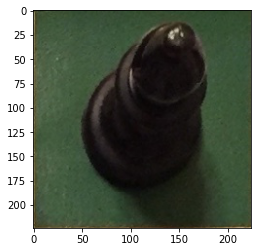

In [49]:
from keras.preprocessing import image
img = tf.keras.utils.load_img("pawn.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("model.h5")
output = saved_model.predict(img)
